### Problem Statement

An Ed-Tech company wants to hire data scientists among people who have successfully passed some courses and then signed up for training. The company wants to know which of the people are really looking for a job change and will prefer working with them, after completion of training because it helps to reduce the cost and time for categorization of candidates. 

Information related to demographics, education, the experience is in hands from candidates signup and enrollment.

* enrollee_id: Unique ID for the candidate

* city: City code

* city_ development _index: Development index of the city (scaled)

* gender: Gender of the candidate

* relevent_experience: Relevant experience of the candidate

* enrolled_university: Type of University course enrolled if any

* education_level: Education level of candidate

* major_discipline: Education major discipline of the candidate

* experience: Candidate total experience in years

* company_size: No of employees in current employer's company

* company_type: Type of current employer

* lastnewjob: Difference in years between previous job and current job

* training_hours: training hours completed

* target: 0 – Not looking for a job change, 1 – Looking for a job change


#### What is City Development Index?

* The City Development Index was developed for the Second United Nations Conference on Human Settlements (Habitat II) in 1996 and measures the level of development in cities. The Urban Indicators Programme of the United Nations Human Settlements Programme (UN-Habitat) developed the indicator so that they could rank cities of the world according to their level of development and as a display of indicators depicting development. The CDI cuts across the different clusters identified in the Urban Indicator Framework as it is based on five sub-indices namely, infrastructure, waste, health, education, and city product. It is useful as it provides a snap-shot view of how cities are doing concerning the different indices

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries to tune model, get different metric scores, and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn import metrics
# Library to impute missing values
from sklearn.impute import KNNImputer
# Library to build a logistic regression model
from sklearn.linear_model import LogisticRegression
# Library to supress the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
job = pd.read_csv('jobs_data.csv')

In [3]:
# copying data to another varaible to avoid any changes to original data
data = job.copy()

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
data.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


### Understand the shape of the dataset.

In [6]:
data.shape

(19158, 14)

* The dataset has 19158 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

* Only 4 variables are numerical rest all are object types.
* 8 columns have less than 19158 non-null values i.e. columns have missing values.

**Check the percentage of missing values in each column**

In [8]:
pd.DataFrame(data={'% of Missing Values':round(data.isnull().sum()/data.isnull().count()*100,2)}).sort_values(by='% of Missing Values',ascending=False)

,% of Missing Values
company_type,32.05
company_size,30.99
gender,23.53
major_discipline,14.68
education_level,2.40
last_new_job,2.21
enrolled_university,2.01
experience,0.34
enrollee_id,0.00
city,0.00


* `company_type` column has 32.05% missing values out of the total observations.
* `company_size` column has 30.99% missing values out of the total observations.
* `gender` column has 23.53% missing values out of the total observations.
* `major_discipline` column has 14.68% missing values out of the total observations.
* `education_level` column has 2.40% missing values out of the total observations.
* `last_new_job` column has 2.21% missing values out of the total observations.
* `enrolled_university` column has 2.01% missing values out of the total observations.
* `experience` column has 0.34% missing values out of the total observations.
* We will impute these values after we split the data into train and test sets.

### Summary of the dataset.

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


**Observations-**
* `enrollee_id:` enrollee_id being a unique identifier doesn't add any meaning to the analysis and can be dropped.
* `city_developement_index:` Since the value of the city development index is normalized a 0.82 average value indicates that most of the data we have is from fairly developed cities (metropolitan cities). However, the range of the index is large and varies from 0.448 to 0.949.
* `training_hours:` Training hours has a wide range from 60hrs to 336hrs. On average, an enrollee has 65hrs of training. 755 of the enrollees less than (or equal to) 88hrs of training.
* `target:` 75% of the enrollees in data are not looking for a job and maybe they just signed up to get trained in new technologies

In [10]:
data.drop(['enrollee_id'],axis=1,inplace=True)

In [11]:
data.describe(include=['object']).T

,count,unique,top,freq
city,19158,123,city_103,4355
gender,14650,3,Male,13221
relevent_experience,19158,2,Has relevent experience,13792
enrolled_university,18772,3,no_enrollment,13817
education_level,18698,5,Graduate,11598
major_discipline,16345,6,STEM,14492
experience,19093,22,>20,3286
company_size,13220,8,50-99,3083
company_type,13018,6,Pvt Ltd,9817
last_new_job,18735,6,1,8040


**Observations-**
* Most of the records are from city_103.
* Most of the enrollees are Males.
* Most enrollees have some relevant experience.
* Most of the enrollees were not enrolled in a university.
* Most of the enrollees are graduates.
* Most of the enrollees have STEM as their major discipline.
* Most enrollees have worked in a pvt_ltd company.

### EDA

### Univariate analysis

In [12]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on city_development_index

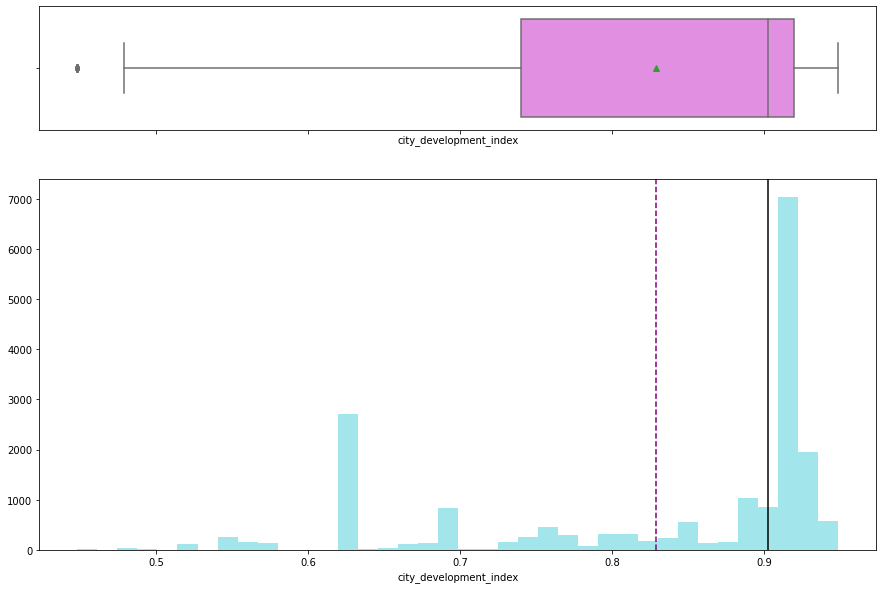

In [13]:
histogram_boxplot(data['city_development_index'])

* Distribution of city_development_index is left-skewed.
* Cities with city_development_index less than ~0.45 are outliers - such cities might be underdeveloped or tier 3 cities.
* Let's explore it further.

In [14]:
data[data['city_development_index']<0.45]

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1523,city_33,0.448,NaN,Has relevent experience,Part time course,Graduate,STEM,10,50-99,NGO,>4,48,1.0
4744,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,43,1.0
5010,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,1,NaN,NaN,never,73,1.0
5265,city_33,0.448,NaN,No relevent experience,NaN,High School,NaN,5,NaN,Pvt Ltd,never,86,1.0
5567,city_33,0.448,NaN,Has relevent experience,Part time course,Masters,STEM,6,NaN,NaN,1,18,1.0
6127,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,4,NaN,Public Sector,4,32,1.0
7724,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,28,0.0
7864,city_33,0.448,Male,Has relevent experience,no_enrollment,Graduate,STEM,8,NaN,NaN,>4,74,0.0
9134,city_33,0.448,NaN,No relevent experience,Part time course,Masters,Other,2,<10,NGO,1,23,1.0
10401,city_33,0.448,Male,No relevent experience,no_enrollment,Graduate,STEM,5,10000+,Pvt Ltd,2,36,0.0


* All such records with a city development index less than 0.45 are from city_33.

### Observations on training_hours

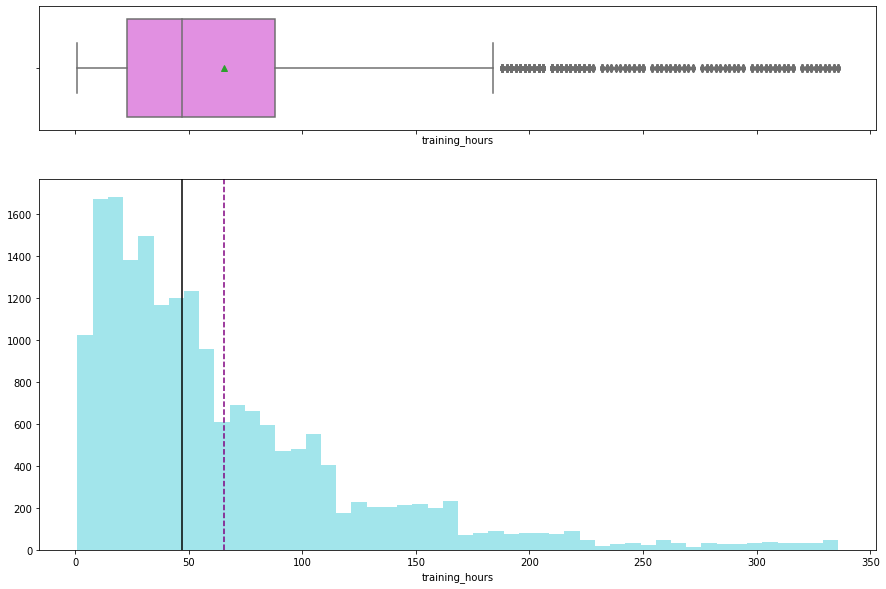

In [15]:
histogram_boxplot(data['training_hours'])

* Distribution of training_hours is right-skewed with many outliers.
* From the boxplot, we can see that enrollees with more than ~175hrs of training are outlliers.

In [16]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### Observations on gender

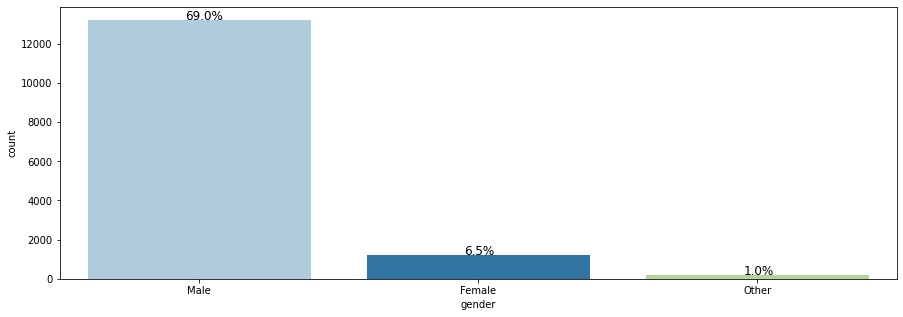

In [17]:
perc_on_bar('gender')

* 69% of the enrollees are male.

### Observations on relevant_experience

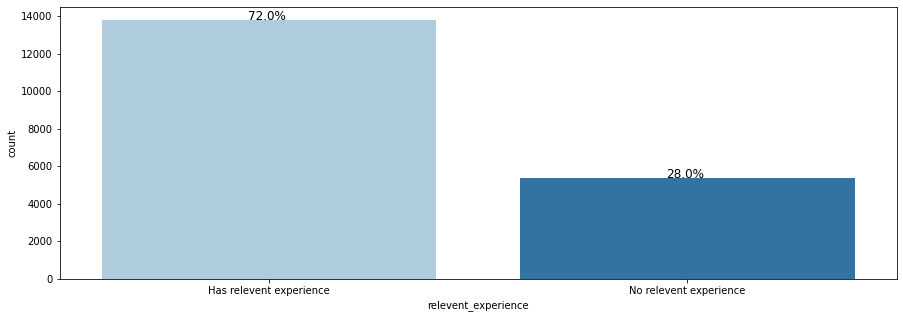

In [18]:
perc_on_bar('relevent_experience')

* 72% of the enrollees have some relevant experience.

### Observations on enrolled_university

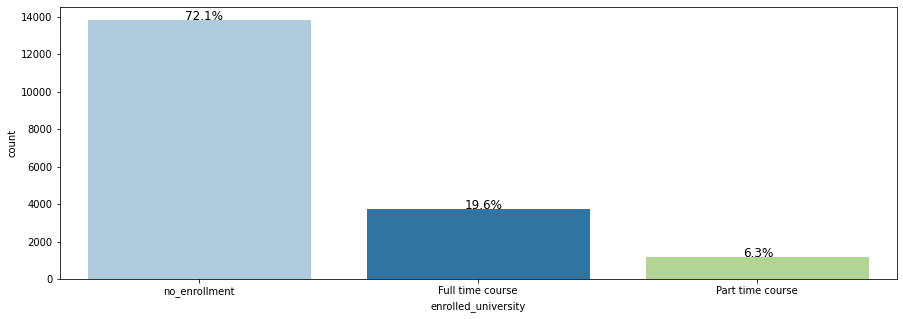

In [19]:
perc_on_bar('enrolled_university')

* 72.1% of the enrollees had no enrollment in universities followed by 19.6% of the enrollees with full-time course.

### Observations on education_level

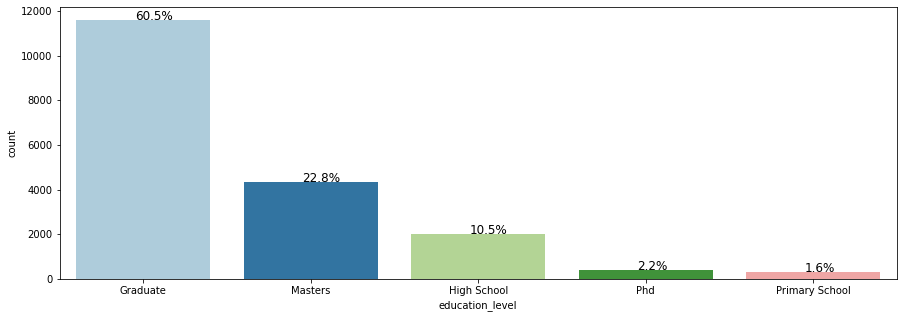

In [20]:
perc_on_bar('education_level')

* 60.5% of the enrollees are graduates, followed by 22.8% of the enrollees having Masters degree.

### Observations on major_discipline

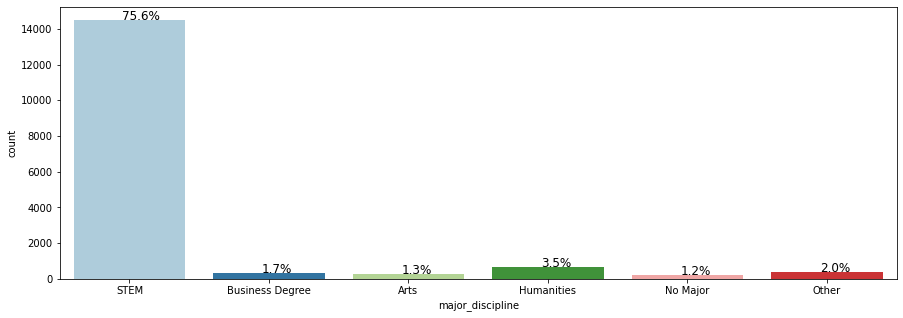

In [21]:
perc_on_bar('major_discipline')

* 75.5% of the enrollees have STEM as their major discipline. STEM includes programs in science, technology, engineering, and mathematics.

### Observations on company_size

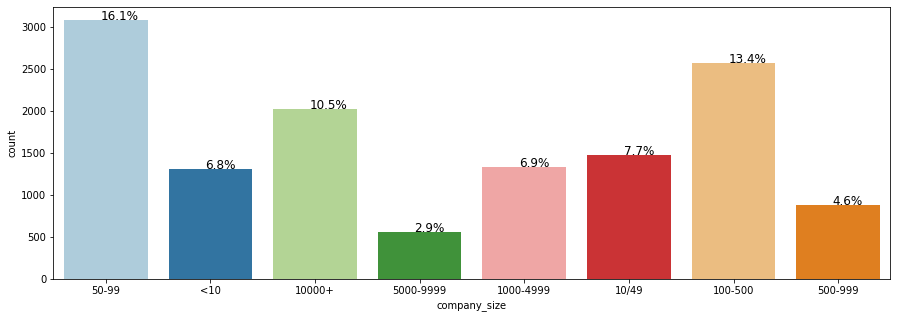

In [22]:
perc_on_bar('company_size')

* 16.1% of the enrollees have worked in a company with 50-99 employees, followed by 13.4% of the enrollees who have worked in a company with 100-500.

### Observations on company_type

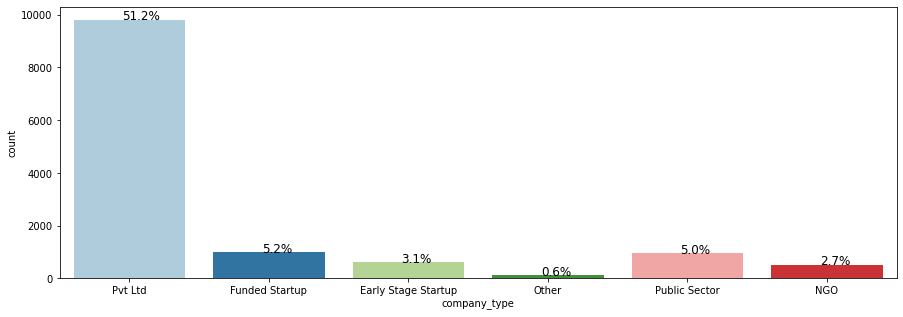

In [23]:
perc_on_bar('company_type')

* 51.2% of the enrollees have worked in private companies, followed by 8.3% enrollees in startups.

### Observations on last_new_job

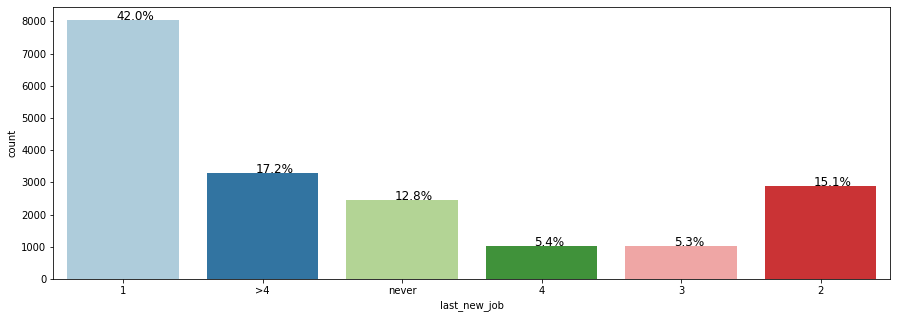

In [24]:
perc_on_bar('last_new_job')

* 42% of the enrollees have a difference of 1 year between their current and previous job followed by 17.2% of the enrollees with more than 4 years of difference.
* Never here can mean that enrollee has never worked before(freshers) or is not working right now.

## Bivariate Analysis

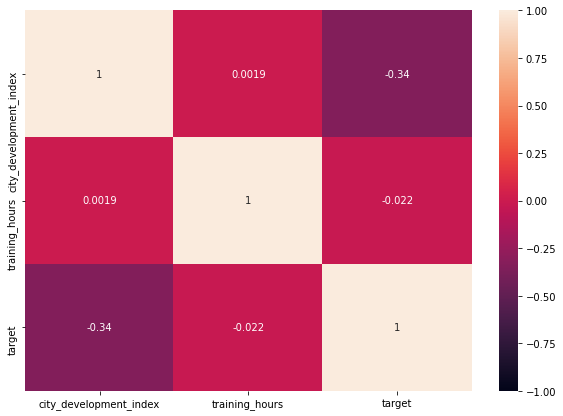

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2g')
plt.show()

* There is no strong correlation either with the target or between any independent variable.
* City development index has a negative relation with the target.

* Encoding 1 and 0 to 'yes' and 'no' respectively, for analysis.

In [26]:
data['target'].replace(1,'yes',inplace=True)
data['target'].replace(0,'no',inplace=True)

In [27]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['target'],margins=True).sort_values(by='yes',ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['target'],normalize='index').sort_values(by='yes',ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

### target vs city

target       no   yes    All
city                        
All       14381  4777  19158
city_21    1105  1597   2702
city_103   3427   928   4355
city_160    646   199    845
city_16    1354   179   1533
...         ...   ...    ...
city_129      3     0      3
city_8        4     0      4
city_39      11     0     11
city_111      3     0      3
city_2        7     0      7

[124 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


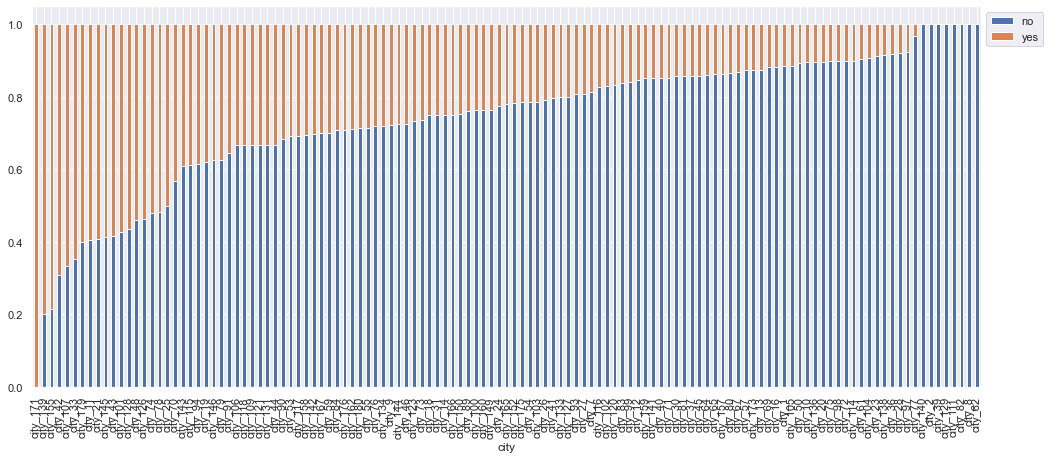

In [28]:
stacked_plot(data['city'])

* Cities 171,139, 155, and 42 show the highest percentage of enrollees looking for a job. 
* Cities with the highest percentage of enrollees looking for a job might be from tier 2 or tier 3 cities looking for better opportunities.
* This column captures a clear difference between enrollees looking for a job and those who are not, it can act as an important predictor.

### target vs gender

target     no   yes    All
gender                    
All     11262  3388  14650
Male    10209  3012  13221
Female    912   326   1238
Other     141    50    191
------------------------------------------------------------------------------------------------------------------------


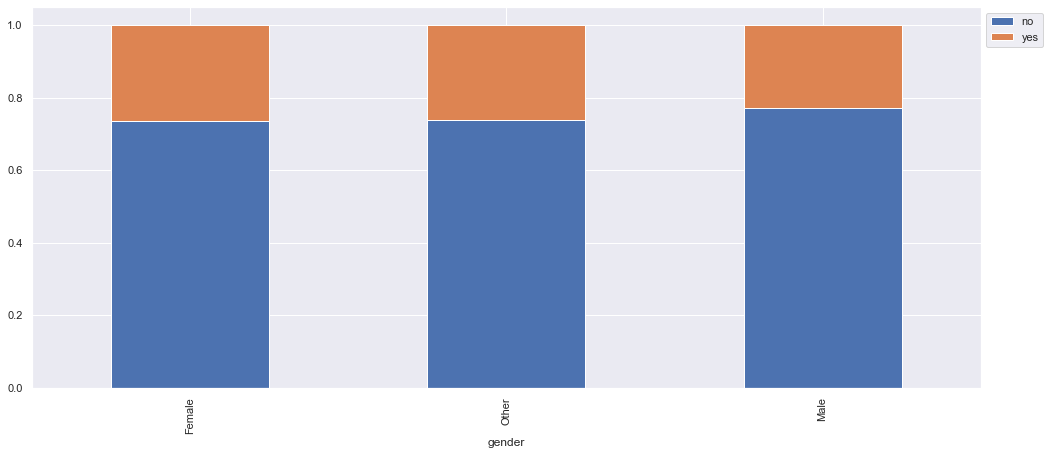

In [29]:
stacked_plot(data['gender'])

* Females followed by other gender enrollees are the ones actively looking for a job change.
* Let's add the unknown as a category (inplace of missing values) and see if there's a change in observations.

In [30]:
data['gender'] = data['gender'].replace(np.nan,'unknown')

target      no   yes    All
gender                     
All      14381  4777  19158
Male     10209  3012  13221
unknown   3119  1389   4508
Female     912   326   1238
Other      141    50    191
------------------------------------------------------------------------------------------------------------------------


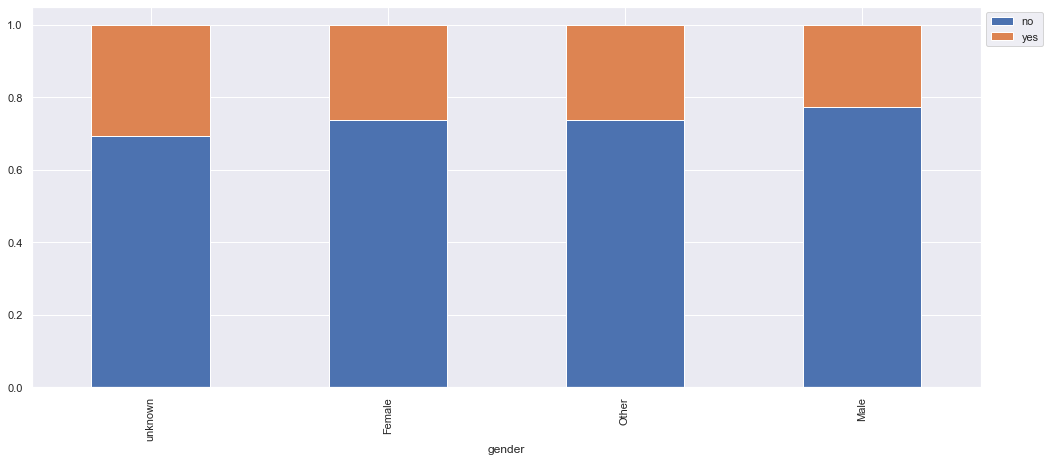

In [31]:
stacked_plot(data['gender'])

* 'Unknown' gender has the most percentage of enrollees looking for a job change.

### target vs relevant_experience

target                      no   yes    All
relevent_experience                        
All                      14381  4777  19158
Has relevent experience  10831  2961  13792
No relevent experience    3550  1816   5366
------------------------------------------------------------------------------------------------------------------------


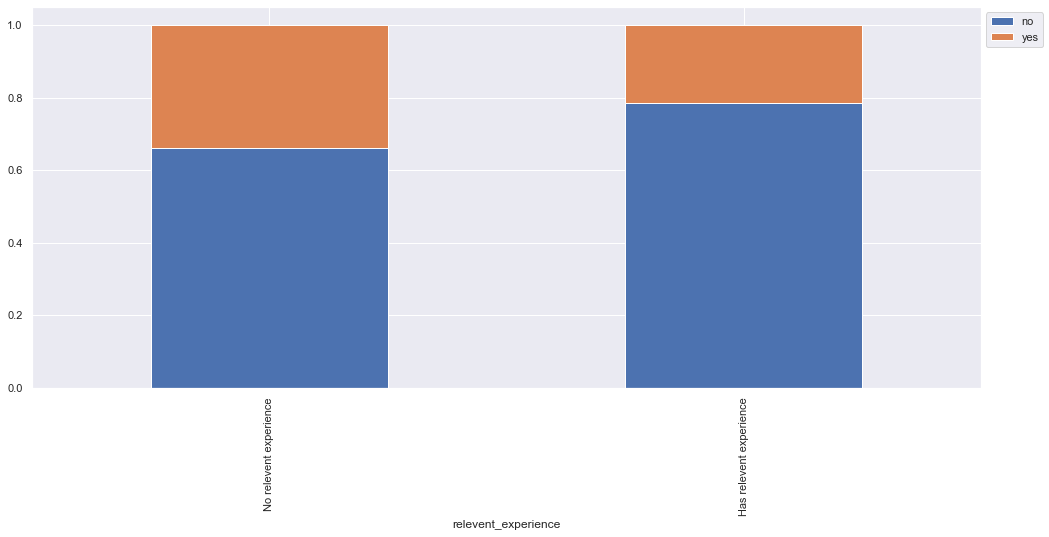

In [32]:
stacked_plot(data['relevent_experience'])

* 35% of the enrollees who do not have relevant experience are the ones looking for a job change.
* Such enrollees might be freshers looking for opportunities.
* 20% of the enrollees who have relevant experience are also looking for a job change such enrollees after upskilling might be looking for new roles with the newly acquired skills.

### target vs enrolled_university

target                  no   yes    All
enrolled_university                    
All                  14118  4654  18772
no_enrollment        10896  2921  13817
Full time course      2326  1431   3757
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


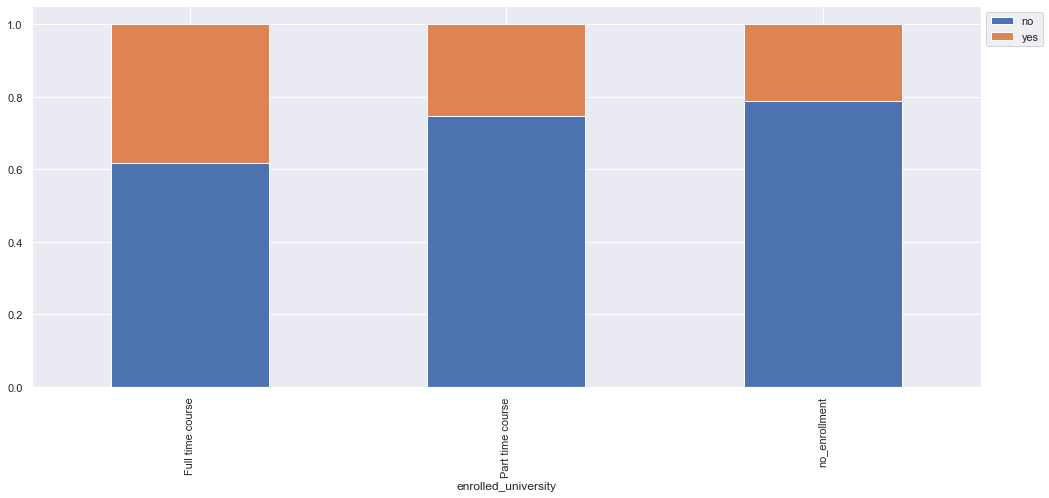

In [33]:
stacked_plot(data['enrolled_university'])

* There's a high portion of enrollees looking for a job change across all three categories.
* ~40% of the enrollees with full-time courses are looking for a job change.
* ~30% of the enrollees with part-time courses are looking for a job change.

### target vs enrolled_university

target              no   yes    All
education_level                    
All              14025  4673  18698
Graduate          8353  3245  11598
Masters           3426   935   4361
High School       1623   394   2017
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


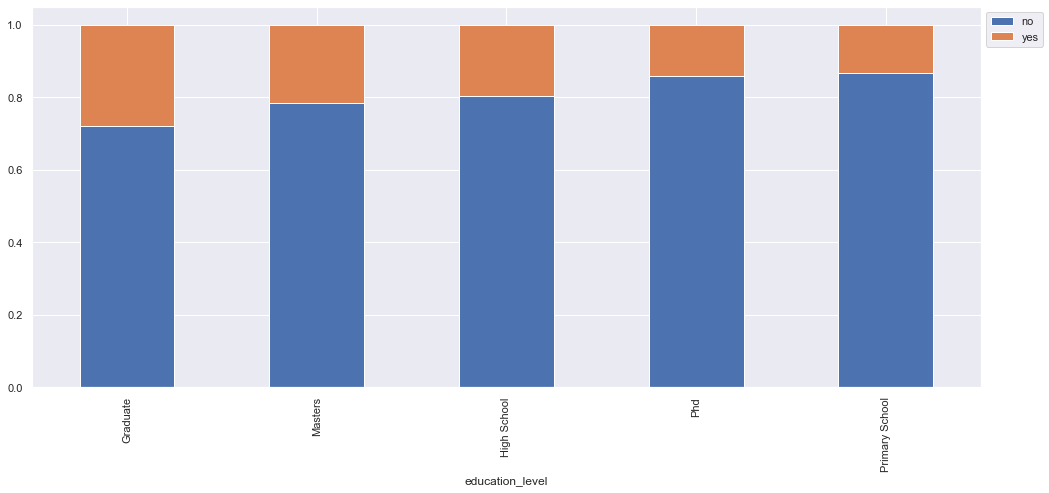

In [34]:
stacked_plot(data['education_level'])

* There's a high proportion of enrollees looking for a job change across Graduates, Masters, and High Schooler categories.
* ~30% of the graduate enrollees are looking for a job change.
* 20% of the enrollees with a master's degree are looking for a job change.

### target vs major_discipline

target               no   yes    All
major_discipline                    
All               12117  4228  16345
STEM              10701  3791  14492
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
No Major            168    55    223
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


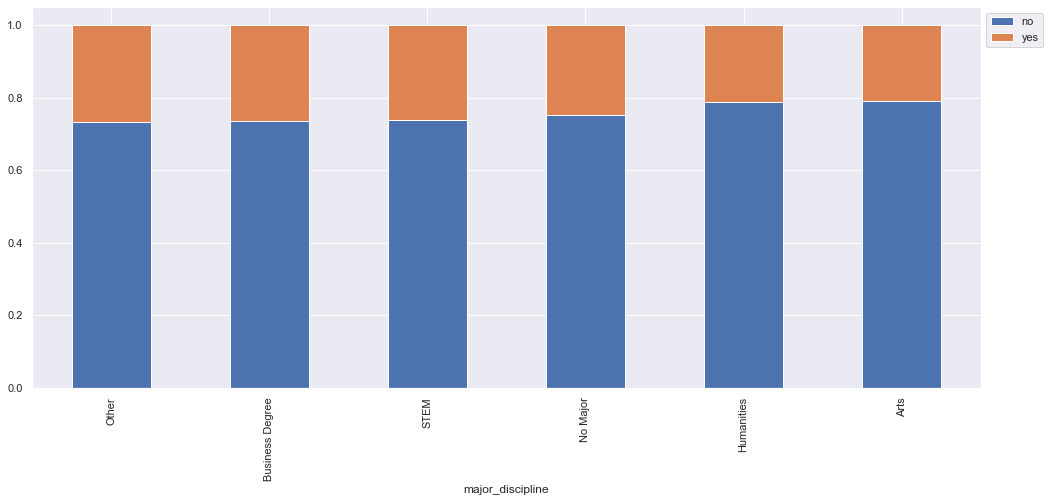

In [35]:
stacked_plot(data['major_discipline'])

* There's a high proportion of enrollees looking for a job change across all categories.

### target vs experience

target         no   yes    All
experience                    
All         14339  4754  19093
>20          2783   503   3286
3             876   478   1354
4             946   457   1403
5            1018   412   1430
2             753   374   1127
6             873   343   1216
7             725   303   1028
<1            285   237    522
1             316   233    549
9             767   213    980
10            778   207    985
8             607   195    802
11            513   151    664
15            572   114    686
14            479   107    586
12            402    92    494
13            322    77    399
16            436    72    508
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


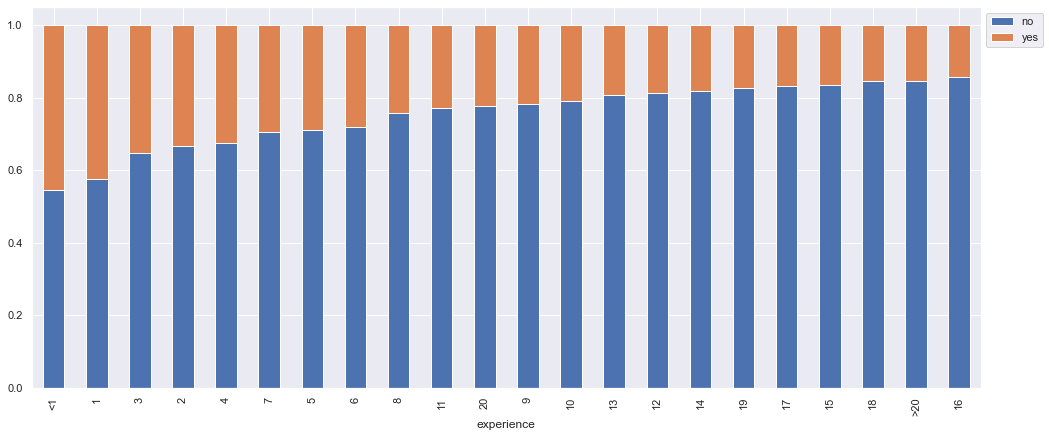

In [36]:
stacked_plot(data['experience'])

* There's a high proportion of enrollees looking for a job change having less than 10 years of experience.
* <1 year will the freshers who after training would want to do a job in a relevant field.

### target vs company_size

target           no   yes    All
company_size                    
All           10853  2367  13220
50-99          2538   545   3083
100-500        2156   415   2571
10000+         1634   385   2019
Oct-49         1127   344   1471
<10            1084   224   1308
1000-4999      1128   200   1328
500-999         725   152    877
5000-9999       461   102    563
------------------------------------------------------------------------------------------------------------------------


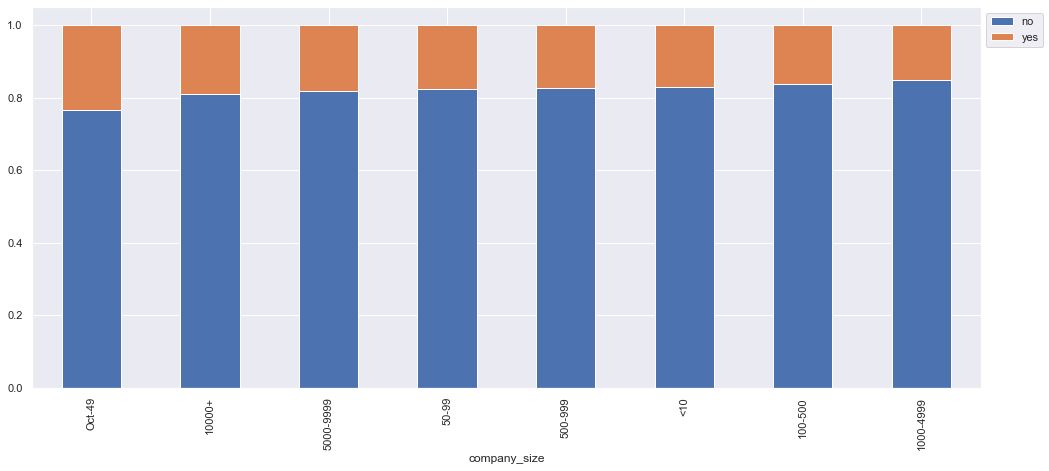

In [37]:
stacked_plot(data['company_size'])

* ~20% of the enrollees who have been in companies of different sizes are looking for a job change.

### target vs company_type

target                  no   yes    All
company_type                           
All                  10625  2393  13018
Pvt Ltd               8042  1775   9817
Public Sector          745   210    955
Early Stage Startup    461   142    603
Funded Startup         861   140   1001
NGO                    424    97    521
Other                   92    29    121
------------------------------------------------------------------------------------------------------------------------


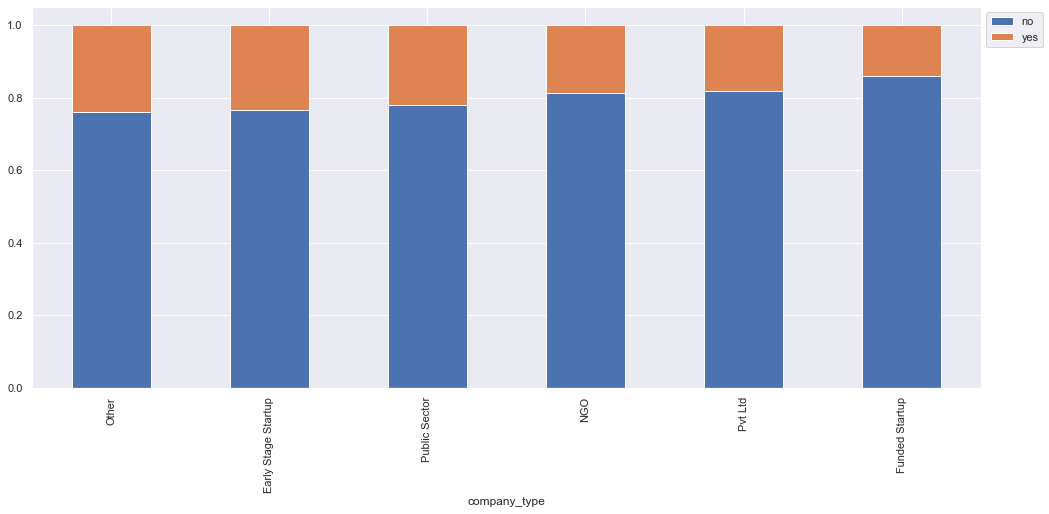

In [38]:
stacked_plot(data['company_type'])

* Enrollees from funded startups are the ones with less interest a possible reason being their startup just got funded, and they are looking for growth there and just want to upskill by undergoing the training.
* Across all types of companies/sectors ~20% of the enrollees are looking for a job change.

### target vs last_new_job

target           no   yes    All
last_new_job                    
All           14112  4623  18735
1              5915  2125   8040
never          1713   739   2452
2              2200   700   2900
>4             2690   600   3290
3               793   231   1024
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


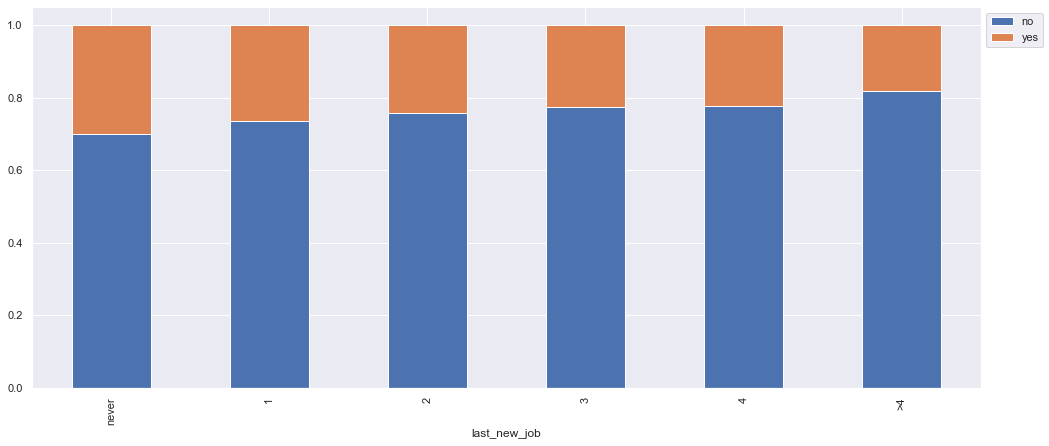

In [39]:
stacked_plot(data['last_new_job'])

* Our earlier thought of 'never' representing freshers or those who are not working right now seems true as they are the ones most interested in a job change(looking for a start).

In [40]:
### Function to plot distributions and Boxplots of enrollees
def plot(x,target='target'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of an enrollee not looking for a job')
    sns.distplot(data[(data[target] == 'no')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of an enrollee looking for a job')
    sns.distplot(data[(data[target] == 'yes')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t target')
    sns.boxplot(data[target],data[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t target - Without outliers')
    sns.boxplot(data[target],data[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

### target vs training_hours

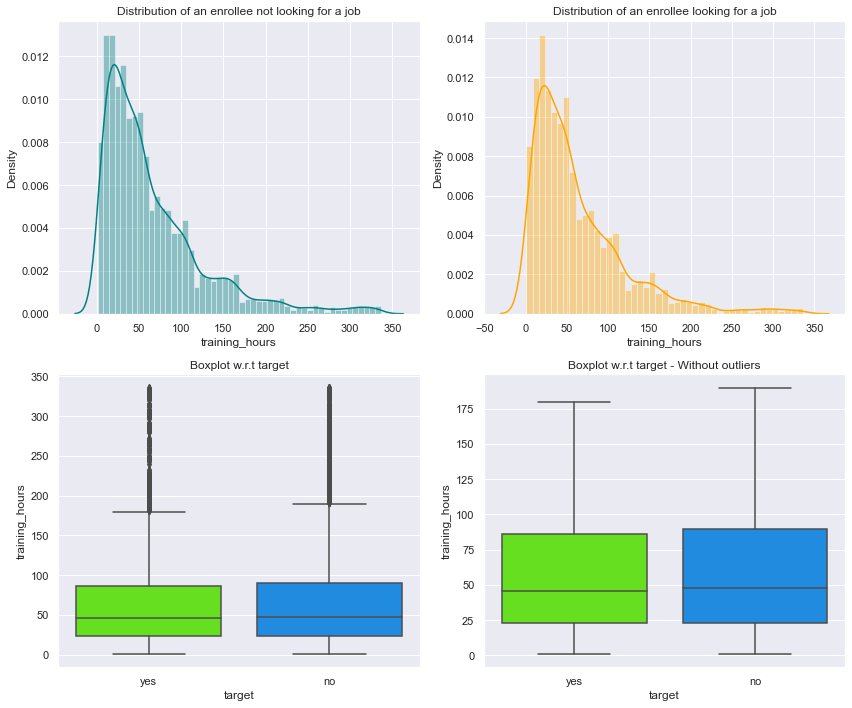

In [41]:
plot('training_hours')

* Training hours don't seem to have any impact on the target variable.

### target vs city_development_index

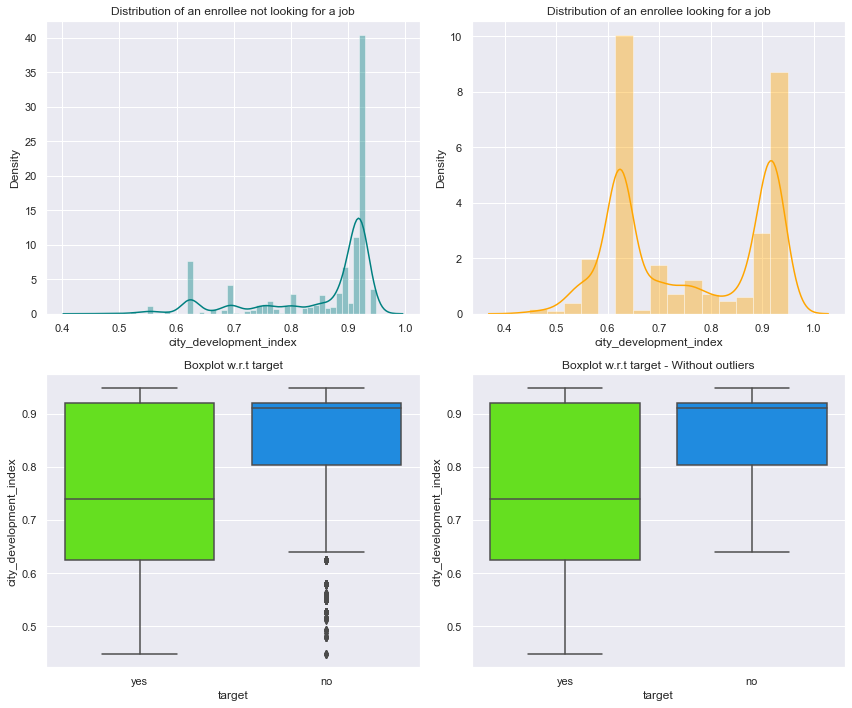

In [42]:
plot('city_development_index')

* There's a stark difference between the enrollees looking for a job and an enrollee not looking for a job.
* Enrollee from a city with a higher development index would be less likely to look for a change in a job as compared to the enrollee coming from a city with a lower development index.
* Enrollees coming from cities with a low development index might be looking for better opportunities in metropolitan cities by upskilling themselves after undergoing the training.

### Feature Engineering

In [30]:
data['city'].nunique()

123

* There are 123 unique cities in data, we can reduce the levels by grouping them into 3 major categories:
  * Developed city - with city development index greater than 0.90
  * Developing city - with city development index between 0.74 and 0.90
  * Under-Developed city - with city development index between 0.4 and 0.74

In [31]:
data['city_development_index'].describe()

count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [32]:
# Discretize variable into equal-sized buckets based on quantiles
data['city'] = pd.qcut(data['city_development_index'],q = [0,0.25,0.5,1],labels=['Under_Developed','Developing','Developed'])

In [33]:
data['city'].value_counts()

Developed          9561
Under_Developed    4838
Developing         4759
Name: city, dtype: int64

* 123 unique values have been binned into 3 categories.

### Missing-Value Treatment

* We will use KNN imputer to impute missing values.
* `KNNImputer`: Each sample's missing values are imputed by looking at the n_neighbors nearest neighbors found in the training set. Default value for n_neighbors=5.
* KNN imputer replaces missing values using the average of k nearest non-missing feature values.
* Nearest points are found based on euclidean distance.

In [34]:
data.isnull().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [35]:
imputer = KNNImputer(n_neighbors=5)

In [36]:
reqd_col_for_impute = ['gender','enrolled_university','education_level','major_discipline','experience',
                       'company_size','company_type','last_new_job']

In [37]:
data[reqd_col_for_impute].head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,NaN,Full time course,Graduate,STEM,5,NaN,NaN,never
3,NaN,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4


In [38]:
data1=data.copy()

In [39]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them, 
# this is for KNN to get the distance and convert back
gender = {'Male':0,'Female':1,'Other':2}
data1['gender'] = data1['gender'].map(gender)

enrolled_university = {'no_enrollment':0,'Full time course':1,'Part time course': 2}
data1['enrolled_university'] = data1['enrolled_university'].map(enrolled_university)

education_level= {'Graduate':0, 'Masters':1,'High School':2,'Phd':3, 'Primary School':4}  
data1['education_level'] = data1['education_level'].map(education_level)

major_discipline = {'STEM':0, 'Business Degree':1,'Arts':2,'Humanities':3,'No Major':4,'Other':5}
data1['major_discipline'] = data1['major_discipline'].map(major_discipline)

experience = {'<1':0,'1':1,'2':2 ,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'11':11,'12':12,'13':13 ,'14':14 ,
              '15':15,'16':16,'17':17,'18':18,'19':19,'20':20,'>20':21} 
data1['experience'] = data1['experience'].map(experience)

company_type = {'Pvt Ltd':0,'Funded Startup':1,'Early Stage Startup':2,'Other':3,'Public Sector':4 ,'NGO':5} 
data1['company_type'] = data1['company_type'].map(company_type)

company_size ={'<10':0,'10/49':1,'100-500':2,'1000-4999':3,'10000+':4,'50-99':5,'500-999':6,'5000-9999':7}
data1['company_size'] = data1['company_size'].map(company_size)

last_new_job = {'never':0,'1':1,'2':2,'3':3,'4':4,'>4':5}
data1['last_new_job'] = data1['last_new_job'].map(last_new_job)

In [40]:
data1.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,Developed,0.920,0.0,Has relevent experience,0.0,0.0,0.0,21.0,NaN,NaN,1.0,36,yes
1,Developing,0.776,0.0,No relevent experience,0.0,0.0,0.0,15.0,5.0,0.0,5.0,47,no
2,Under_Developed,0.624,NaN,No relevent experience,1.0,0.0,0.0,5.0,NaN,NaN,0.0,83,no
3,Developing,0.789,NaN,No relevent experience,NaN,0.0,1.0,0.0,NaN,0.0,0.0,52,yes
4,Developing,0.767,0.0,Has relevent experience,0.0,1.0,0.0,21.0,5.0,1.0,4.0,8,no


* Values have been encoded.

### Split Data

In [42]:
X = data1.drop(['target'],axis=1)
y = data1['target'].apply(lambda x : 1 if x=='yes' else 0)

In [43]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)
print(X_train.shape, X_test.shape)

(13410, 12) (5748, 12)


In [44]:
X_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
15848,Developing,0.878,0.0,Has relevent experience,0.0,1.0,3.0,6.0,4.0,0.0,3.0,34
5614,Under_Developed,0.624,0.0,Has relevent experience,0.0,1.0,0.0,6.0,5.0,0.0,5.0,23
3836,Developed,0.920,NaN,Has relevent experience,2.0,1.0,2.0,10.0,5.0,5.0,2.0,146
15930,Developed,0.939,0.0,Has relevent experience,0.0,1.0,0.0,16.0,6.0,0.0,5.0,50
8563,Developed,0.920,0.0,No relevent experience,0.0,0.0,1.0,3.0,NaN,NaN,3.0,25


**Imputing Missing Values**

In [46]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [47]:
X_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
15848,Developing,0.878,0.0,Has relevent experience,0.0,1.0,3.0,6.0,4.0,0.0,3.0,34
5614,Under_Developed,0.624,0.0,Has relevent experience,0.0,1.0,0.0,6.0,5.0,0.0,5.0,23
3836,Developed,0.920,0.0,Has relevent experience,2.0,1.0,2.0,10.0,5.0,5.0,2.0,146
15930,Developed,0.939,0.0,Has relevent experience,0.0,1.0,0.0,16.0,6.0,0.0,5.0,50
8563,Developed,0.920,0.0,No relevent experience,0.0,0.0,1.0,3.0,2.6,0.2,3.0,25


In [57]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64
------------------------------
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


* All missing values have been treated.
* Let's inverse map the encoded values.

In [58]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [59]:
inverse_mapping(gender,'gender')
inverse_mapping(enrolled_university,'enrolled_university')
inverse_mapping(education_level,'education_level')
inverse_mapping(major_discipline,'major_discipline')
inverse_mapping(experience,'experience')
inverse_mapping(company_size,'company_size')
inverse_mapping(company_type,'company_type')
inverse_mapping(last_new_job,'last_new_job')

* Checking inverse mapped values/categories.

In [60]:
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Developed          6654
Under_Developed    3379
Developing         3377
Name: city, dtype: int64
******************************
Male      12104
Female     1179
Other       127
Name: gender, dtype: int64
******************************
Has relevent experience    9671
No relevent experience     3739
Name: relevent_experience, dtype: int64
******************************
no_enrollment       9848
Full time course    2726
Part time course     836
Name: enrolled_university, dtype: int64
******************************
Graduate          8197
Masters           3233
High School       1465
Phd                308
Primary School     207
Name: education_level, dtype: int64
******************************
STEM               11407
Business Degree      785
Humanities           475
Arts                 330
Other                257
No Major             156
Name: major_discipline, dtype: int64
******************************
>20    2287
4      1010
5       996
3       963
6       849
2       778
7       724
9

In [61]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Developed          6654
Under_Developed    3379
Developing         3377
Name: city, dtype: int64
******************************
Male      12104
Female     1179
Other       127
Name: gender, dtype: int64
******************************
Has relevent experience    9671
No relevent experience     3739
Name: relevent_experience, dtype: int64
******************************
no_enrollment       9848
Full time course    2726
Part time course     836
Name: enrolled_university, dtype: int64
******************************
Graduate          8197
Masters           3233
High School       1465
Phd                308
Primary School     207
Name: education_level, dtype: int64
******************************
STEM               11407
Business Degree      785
Humanities           475
Arts                 330
Other                257
No Major             156
Name: major_discipline, dtype: int64
******************************
>20    2287
4      1010
5       996
3       963
6       849
2       778
7       724
9

* Inverse mapping returned original labels.

### Encoding categorical varaibles

In [62]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(13410, 56) (5748, 56)


* After encoding there are 56 columns.

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting an enrollee is looking for a job change but in reality, the enrollee is not looking for a change - Loss of resources
2. Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change  - Loss of opportunity

#### Which case is more important? 
* Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change i.e. losing on a potential candidate as the candidate will not be targeted by the HR team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [63]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [64]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression 

In [65]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

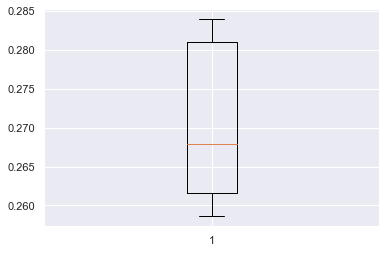

In [66]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.25 to 0.29 recall.
* Let's check the performance on test data.

Accuracy on training set :  0.7683072334079045
Accuracy on test set :  0.7635699373695198
Recall on training set :  0.28169856459330145
Recall on test set :  0.2826238660153524
Precision on training set :  0.5719489981785064
Precision on test set :  0.5502717391304348


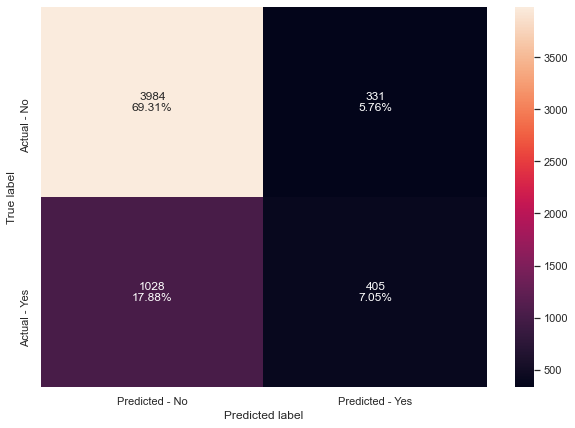

In [67]:
#Calculating different metrics
scores_LR = get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

* Logistic Regression has given a generalized performance on training and test set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 3344
Before UpSampling, counts of label 'No': 10066 

After UpSampling, counts of label 'Yes': 10066
After UpSampling, counts of label 'No': 10066 

After UpSampling, the shape of train_X: (20132, 56)
After UpSampling, the shape of train_y: (20132,) 



### Logistic Regression on oversampled data

In [70]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

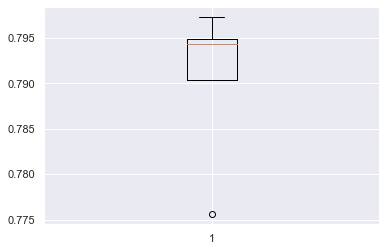

In [71]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

* Performance of model on training set varies between 0.76 to 0.81, which is an improvement from the previous model
* Let's check the performance on the test set.

Accuracy on training set :  0.8278859527121002
Accuracy on test set :  0.743910925539318
Recall on training set :  0.8013113451221935
Recall on test set :  0.44312630844382417
Precision on training set :  0.846291050257056
Precision on test set :  0.4851031321619557


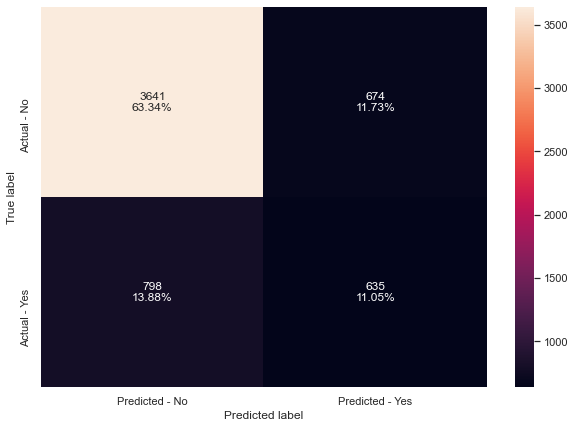

In [72]:
#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

* Performance on the training set improved but the model is not able to replicate the same for the test set.
* Model is overfitting.
* Lets try:

  a) Regularization to see if overfitting can be reduced

  b) Undersampling the train to handle the imbalance between classes and check the model performance.

### Regularization

In [73]:
# Choose the type of classifier. 
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1, 2.0, 0.3, 0.01)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7700675541426585
Accuracy on test set :  0.7379958246346555
Recall on training set :  0.7188555533479039
Recall on test set :  0.5094207955338451
Precision on training set :  0.800885445489762
Precision on test set :  0.47619047619047616


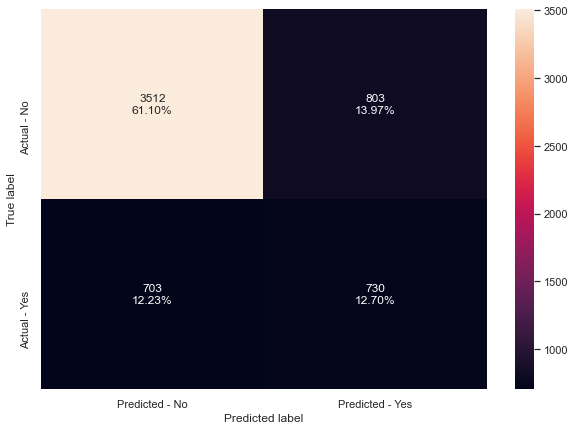

In [74]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

* After regularization, overfitting has reduced to some extent and the model is also performing well.
* Let's try undersampling now.

### Undersampling train data using SMOTE

In [75]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSamplers(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [76]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train==0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 3344
Before Under Sampling, counts of label 'No': 10066 

After Under Sampling, counts of label 'Yes': 3344
After Under Sampling, counts of label 'No': 3344 

After Under Sampling, the shape of train_X: (6688, 56)
After Under Sampling, the shape of train_y: (6688,) 



### Logistic Regression on undersampled data

In [77]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validator` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

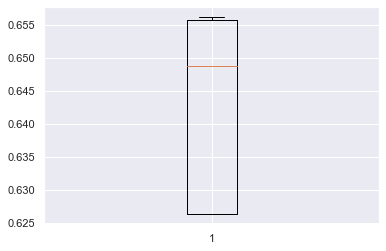

In [78]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.62 to 0.67, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the test set.

Accuracy on training set :  0.7096291866028708
Accuracy on test set :  0.7275574112734864
Recall on training set :  0.6471291866028708
Recall on test set :  0.6427076064200977
Precision on training set :  0.7395762132604238
Precision on test set :  0.46632911392405063


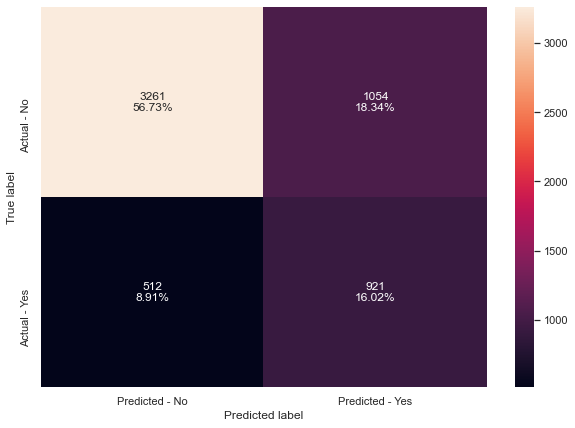

In [79]:
#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

* Model has given a generalized performance on training and test set.
* Model performance has improved using downsampling - Logistic regression is now able to differentiate well between positive and negative classes.

In [80]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [81]:
# defining list of models
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [82]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [83]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression-Regularized (Oversampled data)','Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.768307,0.763570,0.281699,0.282624,0.571949,0.550272
1,Logistic Regression on Oversampled data,0.827886,0.743911,0.801311,0.443126,0.846291,0.485103
2,Logistic Regression-Regularized (Oversampled d...,0.770068,0.737996,0.718856,0.509421,0.800885,0.476190
3,Logistic Regression on Undersampled data,0.709629,0.727557,0.647129,0.642708,0.739576,0.466329


* Logistic regression model on undersampled data has given a generalized performance with the highest recall on test data.

### Finding the coefficients

In [84]:
log_odds = log_reg_under.coef_[0]
pd.DataFrame(log_odds, X_train_un.columns, columns=['coef']).T

,city_development_index,training_hours,city_Developing,city_Developed,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
coef,-0.737874,-0.000661,-1.516891,-1.400175,-0.0431,0.315619,0.501997,-0.475363,-0.378106,-0.665804,...,0.162418,-0.592193,0.107664,-0.207751,-0.278861,0.002347,-0.025875,0.082312,0.073618,-0.253003


###  Converting coefficients to odds

In [87]:
odds = np.exp(np.abs(log_reg_under.coef_[0]))-1
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train_un.columns, columns=['Change in odds']).T

,city_development_index,training_hours,city_Developing,city_Developed,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
Change in odds,1.091485,0.000662,3.558032,3.055911,0.044042,0.371108,0.652018,0.608598,0.459518,0.946054,...,0.176352,0.807949,0.113674,0.230906,0.321624,0.00235,0.026212,0.085795,0.076396,0.287888


### Conclusion

* city_developement_index: For a one-unit increase in the city development index, we expect to see about a 109% decrease in the odds of a person looking for a job change.

* training_hours: For a one-unit increase in the training hours, we expect to see about a 0.06% decrease in the odds of a person looking for a job change.

* city - developing/developed: The odds of a person who is from a developing city looking for a job change is 355% lower than a person who is from an under-developed city. Similarly, The odds of a person who is from a developed city looking for a job change is 305% lower than a person who is from an under-developed city. (keeping under-developed cities as a reference).

* gender - male/other -  The odds of a male looking for a job change is 4% lower than a female. Similarly, The odds of a person from 'other' gender looking for a job change is 37% higher than a female. (keeping females as a reference).

* relevent experience - No relevant experience: The odds of a person who has no relevant job experience looking for a job change is 65% higher than a person who has some relevant experience.

`Interpretation for other attributes can be made in a similar fashion.`

### Business Insights and Recommendations

* As we saw in our analysis and also the logistic regression model shows that several training hours have a very less impact on a person looking to change a job, so the company should not give high importance to this attribute while looking to hire a person.
* A person from an under-developed city would highly be looking for a switch and if an enrollee fulfills the criterion of job role they should be given higher preference than enrollees from other cities (developed and underdeveloped).
* To have a diverse culture in the company enrollees from other genders can be hired as they are more likely to look for a new job role.
* Enrollees with no relevant experience or no experience - generally freshers are more likely to look for a job and such enrollees on fulfilling the criterion of job should be the ones the company should focus on.
* Enrollees from early-stage startups, public sectors, or NGOs are more likely to switch to a new role as compared to the ones from the Private sector or Funded startups.
* Company size is an important aspect, those enrollees who have been in a company with a higher number of employees (1000-5000 or 10000+) are the ones who are actively looking for a switch - Such enrollees might now be looking for higher roles in team management, or it is much easier for such enrollees to fit into a workplace with so higher exposure to working environment.

**Note-**
* The aim of this case study is to cover the concepts of week 1 in model tuning, More predictive models and hyperparameter tuning can be tried to improve the model results.